# **Basic probability, Simple Linear Regression**

# 1. Mean, Variance 


## 1.1 Mean and Variance under uniform distribution  (functions `mean` and `var`)

When you are given a list of data of length $n$, without any further information, it is implicitely assumed that:

1.   a sample space $\Omega$ with $n$ elements, say without loss of generality, $\Omega=\{1,\ldots,n\}$. 
2.   the <i>uniform distribution</i> is put on $\Omega$, that is the probability function is $P:\Omega\to[0,1]$ with $P(i)=\frac 1n$ for $i=1,\ldots,n$.
3. the data defines a random variable $X$ on $\Omega$ by $X(i)=data[i]$ (the $i$-th element in the list $data$).The expected value $E(X)$ of the random variabe $X$ is simply the mean (or average) of the data set.


In this paragraph, let us implement the mean and variance of a list of data,
that we call `mean` and `var`.


In [2]:
# Often the probability is the uniform distribution
# in this case prob= [1/n, ..., 1/n] where n=len(L) . Sample space is {1,...,n}
L= [1,4,-23,4,-2,35]

def mean(L):
## CODE HERE
  avg = 0
  for i in L:
    avg += i/len(L)
  return avg

def var(L):
## CODE HERE 
## you can ofcourse use the function 'mean' above
  differenceSquaredSum = 0
  for i in L:
    differenceSquaredSum += (i - mean(L))**2
  differenceSquaredSum /= len(L)
  return differenceSquaredSum

# TEST
print(mean(L))

#TEST
print(var(L))
print("standard deviaton = ", var(L)**0.5)

3.166666666666666
288.47222222222223
standard deviaton =  16.984470030655128


## 1.2 Expected value and Variance general case  (functions `EV` and `variance`)

In general a set of data may not come alone. For example elements of the sample space do not come all with the same probability. In this case:


1.   The sample space has still length $n$, say $\Omega=\{1,2,\ldots,n\}$.
2.   A probability function defined as a list $prob$ of length $n$ defines the probability that the outcome $i\in\Omega$ appears. $P(i)=prob[i]$
3.   The data set defines a random variable $X$ on $\Omega$, as $X(i)=data[i]$. Now we have a probability mass function $p:\mathbb{R}\to [0,1]$, induced by $X$ and defined by $p(a)=P(X=a)=\sum_{i\in\Omega, X(i)=a} P(i)$.

In this paragraph, we define the the general expected value and variance (`EV` and `variance`).

In [3]:
# Variance
# list L of data (values of a random variable over a sample space)
# list prob of the probabilities given by the probabilit function on the sample space {1,2,3,4,5,6} 
#  Probability(i)=prob[i] for all i

L= [1,4,-23,4,-2,35]
prob=[0.1, 0.2, 0.3, 0.2, 0.1, 0.1]

# TEST IF prob IS A PROBABILITY FUNCTION
s=0
for i in prob:
  s +=i

print(s)  # SHOULD BE 1

# Expected Value
#EV=prob*L

def EV(L, prob):
## CODE HERE
  expected = 0
  for i in range(len(L)):
    expected += L[i]*prob[i]
  return expected

#TEST
print(EV(L,prob))

# Variance
# Var(X)=E(X^2)-2E(X)u+u^2
# Var = sum(p*(x-mu)^2)

def variance(L, prob):
## CODE HERE
  V = 0
  for i in range(len(L)):
    V += prob[i]*(L[i] - EV(L, prob))**2
  return V

#TEST
print(variance(L,prob))
print("standard deviation", variance(L,prob)**0.5)

1.0
-1.8999999999999995
284.49
standard deviation 16.866831356244717


## 1.3 With `numpy`

In [ ]:
import numpy as np

L= [1,4,-23,4,-2,35]
prob=[0.1, 0.2, 0.3, 0.2, 0.1, 0.1]

# np.mean for the mean in case 1.1
print("numpy's mean",np.mean(L))
print("our mean ", mean(L)) 

# np.var for the variance in case 1.1
print("numpy's variance",np.var(L))
print("our variance ", var(L)) 

# np.average does the same as np.mean (if no furhter option is input)
print(np.average(L))

# but can add a "weights" option to simulate a probability distribution
print("numpy's average with weight ", np.average(L, weights=prob))
print("our expected value with weight", EV(L,prob))
# NO VARIANCE FUNCTION THAT HAS WEIGHT


# 2. Histogram of uniform, binomial and normal distribution

## 2.1 `random` submodule of `NumPy`

The `random` submodule of the `NumPy` library implements random generators.

`numpy.random.randint(a)` generates a random integer between 0 and `a`.

`numpy.random.random()` generates a random  float between 0 and 1.

In [9]:
import numpy as np
import matplotlib.pyplot as mpl

for i in range(10):
  a=np.random.randint(100)  # generate a random integer between 0 and 99
  print(a)

a=np.random.random() # generate a float between 0 and 1
print(a)

54
20
51
18
70
61
36
26
97
8
0.13559280622961334


## 2.2 Histogram of some standard distributions

`numpy.random.binomial(n,p)` generates a random integer between 0 and n, following the binomial distribution `binomial(n,p)` of probability `p`.

`numpy.random.normal(mu,sigma)` generates a random float following the normal distribution of mean `mu` and standard deviation `sigma`.

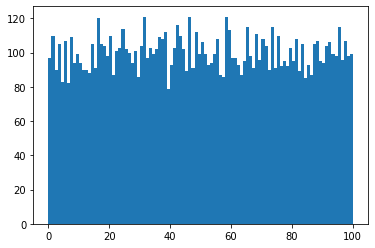

In [ ]:
# uniform distribution [0,99]
L=[np.random.randint(100) for i in range(10000)]

mpl.hist(L, bins=100,range=(0,100))
mpl.show()


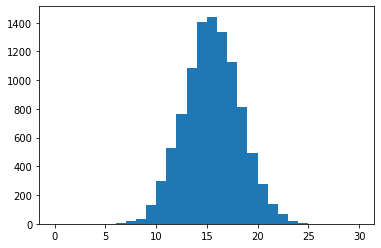

In [ ]:
# binomial distribution bin(30,0.5)
L=[np.random.binomial(30,0.5) for i in range(10000)]

mpl.hist(L,bins=30,range=(0,30))
mpl.show()

In [ ]:
# normal distribution N(0,1)
L=[np.random.normal(0,1) for i in range(10000)]

# 3. Covariance

## 3.1 Covariance under simple linear regression assumptions
Next, let us implement the covariance. First, for data used for linear regression: $X$ and $Y$ are random variables on a same population (=sample space) $\Omega=\{\omega_1, \ldots, \omega_n\} $ and $X(\omega_k)={\rm X}[k]=x_k$ and $Y(\omega_k)={\rm Y}[k]=y_k$  where ${\rm X}$ an ${\rm Y}$ are lists of data (whence defining the random variables $X$ and $Y$).

Since these are bivariate data $(x_k,y_k)$ that come in pair (there is no point $(x_k,y_\ell)$ for $k\ne \ell$), the probability that $P(X=x_k, Y=y_\ell)$ is zero when $k\ne \ell$ and $1/n$ when $k=\ell$. 
In that case (see proba.pptx slide 42) the covariance is:
$$cov(X,Y)=\frac  1 n  \sum_{k=1}^{k=n} (x_k -\bar{x})(y_k-\bar{y}).$$

In [8]:
# write your program cov here
# and test with 
X = [1,2,3,4,5,6,7,8]
Y = [10,-20,30,-40,50,60,-70,80]

def cov(X, Y):
  # write the core of the program here
  avgX = 0
  for i in X:
    avgX += i/len(X)
  avgY = 0
  for j in Y:
    avgY += j/len(Y)
  
  cov = 0
  for k in range(len(X)):
    cov += (X[k] - avgX)*(Y[k] - avgY)
  cov /= len(X)

  return cov

# test
print(cov(X,Y))
# shoud  find 26.5

26.25


## 3.2 Covariance in general
In general $X$ is a r.v. over a population $\Omega$ (of size $n$) and $Y$ one over a population $\Gamma$ (of size $m$). We are given a table $M$ for the joint probability distribution of $X$ and $Y$ (see proba.pptx from slide 29 to 33) that is $M[j][i]=Prob(X=x_i, Y=y_j)$ where $X(\omega_i)=x_i={\rm X}[i]$ and $Y(\gamma_j)=y_j={\rm Y}[j]$. Note that the r.v. $X$ is on the columns, and the r.v. $Y$ on the rows. The general formula for covariance is then:
$$
cov(X,Y)=\sum_{i=1}^{i=n} \sum_{j=1}^{j=m} (X[i] -E(X)) (Y[j]-E(Y))M[j][i]
$$
Implement covariance in this situation. Input are:
  1.   A list of data X of length $n$ that defines the r.v. $X$ on $\Omega$
  2.   A list of data Y of length $m$ that defines the r.v. $Y$ on $\Gamma$.
  3.   A matrix $M$ that defines the joint distribution.

**Hint:**  
*   Have an example in front of you when programming (slide 33 or 36 of proba.pptx)
*   You may first write a program that given the two lists X and Y as well as the table(=list of lists) M, computs $E(X)$ and $E(Y)$ *or* compute the marginal distribution. 

In [ ]:
# M list of lists of same size
# M[j][i]=Probability(X=x_i, Y=y_j)
# X list of values X[i]= =x_i = X(omega_i)   (on population Omega)
# Y list of values Y[j]= y_j = Y(gamma_j) (on population Gamma)


def COV(M, X, Y): #note the capital letters COV to distinguish it from  cov above
  # to find E(X) we need P(X = X[i]) = sum_j M[j][i]
  # then E(X) = sum_i X[i] * P(X = X[i]) 


In [ ]:
# TEST your program COV with the two sets of data (slide 36 of proba.pptx)
# test 1
M=[
   [0, 0.5, 0],
   [0.25, 0, 0.25]
]

X=[-1, 0, 1]
Y=[0,1]



print(COV(M, X, Y))
# we find EY= 0.5
# we find EX= 0.0
# covariance 0.0

######################## (slide 33 of proba.pptx) ##################
# test 2: use the random variables X and Y below, and the joint matrix M below
X = [i for i in range(2,13)]  # value of the sum of the two dice
Y=[i for i in range(1,7)]     # value of one of the two dice
[0 for i in range(-1)]


M=[
   [ 0 for i in range(2,j+1)] + 
   [1/36 for i in range(j+1,j+7)] +
   [0 for i in range(j+7,13)]
   for j in range(1,7)
   ]

print(COV(M,X,Y))
# we find EY= 3.5
# we find EX= 7.0
# covariance 2.9166666667

## 3.3 With `numpy`: covariance matrix

`NumPy` computes a more general object than the *covariance* of two random variables. The function `np.cov(A)` takes as input a matrix `A` of size $n\times m$ (in `NumPy`, an `ndarray`)  whose rows are random variables (each row contains the values of the random variable on the sample space of size $m$).

* $\text{Input: matrix } A\text{ where } A[i,j]=X_i(j),  \text{value of the }i\text{-th random variable }X_i\text{ at $j$}$

* Output: $cov'(A)=[cov'(X_i,X_j)]_{ij}$ is actually  the *unbiased* covariance matrix (see later). The $ij$-th element of $cov'(A)$ is the *unbiased* covariance of the two random variables $X_i$  and $X_j$:
$$cov(X,Y)=\frac{n-1}{n} cov'(X,Y).$$

Remarks:

*   Since $cov(X_i,X_j)=cov(X_j,X_i)$ the covariance matrix is symmetric.
*   Since $cov(X_i,X_i)=Var(X_i)$ the diagonal elements of $cov(A)$ are the variances of $X_1,\ldots,X_n$. 

**In our case** only two random variables so $n=2$:
$$cov([X,Y]^T)=\begin{pmatrix}cov(X,X) & cov(X,Y)\\cov(Y,X) & cov(Y,Y)\end{pmatrix} = \begin{pmatrix}Var(X) & cov(X,Y)\\cov(X,Y) & Var(Y)\end{pmatrix}
 $$

 Therefore in `NumPy`, to take $cov'(X,Y)$  (*unbiased*) the command is `np.cov(A)[0][1]` (or `np.cov(A)[1][0]` since the covariance matrix $cov(A)$ is symmetric). And to take the ("biased") covariance: `np.cov(A)[1][0]*(len(X)-1)/len(X)`



In [ ]:
import numpy as np

# The numpy's covariance is designed for multidimensional random variables. So far, ou random variable are 1-dum.

# Case 1.1: same population, uniform distribution on the population
X = [1,2,3,4,5,6,7,8]
Y = [10,-20,30,-40,50,60,-70,80]
A=np.array([X,Y])  # there is no need to take the transpose regarding hte defintion of the command array. Look next line
print("A=",A)
covmat=np.cov(A)
print(covmat)
print("cov(X,Y)=",covmat[0][1]*(len(X)-1)/len(X))

# 4. Simple Linear regression

## 4.1 Finding the slope and the *y*-intercept
We assume we have a set of bivariate data given by two lists $X=[x_1,\ldots,x_n]$  and $Y=[y_1,\ldots,y_n]$ of same size. We want to infer a linear relationship between $X$ and $Y$:
$$
y_i = a x_i + b +\epsilon_i, \quad \text{for all} \quad 1\le i\le n,
$$
where $a$ and $b$ are constant and $\epsilon_i$ is an error term. The least square method provides:
$$
\hat{a} = \frac{cov(X,Y)}{var(X)},\quad \hat{b}=E(Y) -  E(X) \hat{a} ,
$$
**Memo:** *formally, the data X and Y can be seen as random variables on the sample space $\Omega=\{1,\ldots,n\}$  with the uniform distribution: $P(i)=\frac{1}{n}$ for $1\le i \le n$. Then $X(i)=x_i$ and $Y(i)=y_i$. Since there is no points $(x_i,\ y_j)$ for $i\ne j$, the joint distribution of $X$ and $Y$ is given by the rules: $P(X=x_i,\ Y=y_i)=\frac 1n$ and $P(X=x_i, Y=y_j)=0$ if $i\ne j$*

In [11]:
def SLinReg(X, Y):  #Simple Linear Regression
## CODE HERE
  

## tests
# EXAMPLE slide 44 of proba.pptx
X=[1, 2, 4]
Y=[3, 1, 4]


print(SLinReg(X,Y))
# we should find ~ (0.5, 1.5)

## EXAMPLE2  (from statistics02-student.ipynb)
height = [
46, 49, 50, 50, 49, 50, 53, 48, 49, 50.5, 
49.5, 49, 50, 50, 47.5, 50.5, 48, 49, 49, 50, 
48, 50.5, 48.5, 50.5, 48.5, 49, 48.5, 48.5, 45, 51, 
50.5, 49, 52, 50, 46.5, 50, 50.5, 50, 50, 51, 
49.5, 48.5, 48, 51, 50, 47, 50, 51, 53, 50, 
50, 50.5, 51, 48, 50, 49, 50, 48, 47.5, 48]

weight = [
2700, 3220, 3360, 3500, 3120, 3160, 4150, 3310, 2880, 3090, 
3020, 3360, 3110, 3560, 2990, 3440, 2920, 3060, 3360, 3400, 
3200, 2940, 2850, 3220, 2750, 3020, 2570, 3030, 2410, 3280, 
3140, 3040, 3910, 2770, 2340, 3140, 3560, 3390, 3420, 3450, 
3590, 2830, 3120, 3190, 3600, 2980, 3090, 3630, 4060, 3720, 
3400, 3430, 3250, 2760, 3320, 2930, 3320, 2620, 2860, 2530]

print(cov(height, weight))
# should find ~ 423.8430
print(SLinReg(height, weight))

IndentationError: ignored

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 4.2 Plotting the line and a scatter plot together

In [10]:
import matplotlib.pyplot as mpl
a,b=SLinReg(height,weight)

# scatter plot of the data set
mpl.scatter(height, weight)
# line of the regression. Needs two points.
xcoord=[45,55]
ycoord=[a*45+b,  a*55+b]
mpl.plot(xcoord,ycoord)
mpl.show()

NameError: ignored

##4.3  Evaluating the regression with the correlation
The correlation coefficient $r=cov(X,Y)/σ_X σ_Y$ (denoted also ρ, see proba.pptx slide 37-38) varies between -1 and 1 with values near 1 meaning that Y increases quite linearly with X, and values near -1 meaning that Y decreases quite linearly with X. Values near 0 do not support a  linear relationship between the variations of X and Y.

In [ ]:
def corr(X,Y):
## CODE HERE


print("correlation coefficient X/Y", corr(X,Y))
print("correlation coefficient weight/height", corr(weight, height))

## 4.4 Doing prediction
Weight of a person of height 51.5


In [ ]:
print("weight is estimated to be on that population:", #input here)